# Pesticide: Summary of the data

> Summary plots and tables 



## Imports

In [1]:
import pandas as pd
from pandasql import sqldf
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os
from pathlib import Path
import sys


module_path = Path( os.getcwd() )
module_path = module_path.parent.__str__() + '\\Pesticide'

sys.path.insert(0, module_path)

module_path


'C:\\Users\\44781\\Documents\\GitHub\\Pesticide'

In [2]:
from src.data_loading.loads_from_url import *
from src.data_cleaning.modify_dfs import *
from src.data_visualisation.plot_funcs import *


cwd = module_path

folder_path = os.path.join(cwd,'data')
file_path = []
for x in os.listdir(folder_path):
    file_path.append(os.path.join(folder_path,x) )

# load data and clean    
df = import_ods(file_path[2])

df2 = modify_df(df)

# needs to be added to modify
df2['amount_pc']=df2['amount_detected']/df2['mrl']

df2.loc[df2['amount_pc'].isna(),['amount_pc']]=0

In [3]:

df2.head()

,sample_id,date_of_sampling,description,country_of_origin,retail_outlet,address,brand_name,packer_/_manufacturer,pesticide_residues_found_in_mg/kg_(mrl),product,address_postcode,packer__postcode,chem_name,amount_detected,mrl,amount_pc
0,2464/2018,2018-06-18,The best natural beef dripping,UK,Morrisons,Basingstoke Road Reading RG2 0HB,Morrisons,Morrisons Gain Lane Bradford BD3 7DL,n/a,Animal_fats,RG2 0HB,BD3 7DL,0,0.0,0.0,0.0
1,1700/2018,2018-04-30,Finest beef dripping,UK,Sainsburys,Tritton Road Lincoln LN6 7QN,Britannia,Princes LTD Liverpool L3 1NX,n/a,Animal_fats,LN6 7QN,L3 1NX,0,0.0,0.0,0.0
2,3439/2018,2018-06-18,Finest beef dripping,UK,Sainsburys,Upton Bypass Wirral CH49 6QG,Brittania,Princes LTD Liverpool L3 1NX,n/a,Animal_fats,CH49 6QG,L3 1NX,0,0.0,0.0,0.0
3,4247/2018,2018-04-09,Finest beef dripping,UK,Sainsburys,Sunderland North Riverside Road Sunderland SR5...,Britannia,Princes LTD Liverpool L3 1NX,n/a,Animal_fats,SR5 3TG,L3 1NX,0,0.0,0.0,0.0
4,1771/2018,2018-04-09,Finest beef dripping,UK,Tesco,Dukes Green Avenue Feltham TW14 0LH,Britannia,Princes LTD Liverpool L3 1NX,n/a,Animal_fats,TW14 0LH,L3 1NX,0,0.0,0.0,0.0


In [4]:
df2.describe(include='all', datetime_is_numeric=True)

,sample_id,date_of_sampling,description,country_of_origin,retail_outlet,address,brand_name,packer_/_manufacturer,pesticide_residues_found_in_mg/kg_(mrl),product,address_postcode,packer__postcode,chem_name,amount_detected,mrl,amount_pc
count,5285,5285,5285,5285,5285,5285,5285,5285,5285,5285,5285,5285.0,5285.0,5285.000000,5285.000000,5285.000000
unique,3285,NaN,1439,87,457,1350,434,1104,1719,40,550,332.0,143.0,NaN,NaN,NaN
top,2430/2018,NaN,Conference Pears,UK,Tesco,"Edinburgh Road, Perth PH2 8DX",None stated,Tesco Stores Ltd Welwyn Garden City AL7 1GA,n/a,Grapefruit,PE19 2HD,0.0,0.0,NaN,NaN,NaN
freq,21,NaN,130,1653,653,68,1698,602,1716,390,97,2104.0,2032.0,NaN,NaN,NaN
mean,NaN,2018-07-05 00:43:52.052980224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214598,2.644282,0.302054
min,NaN,2018-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,2018-04-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,2018-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.500000,0.010000
75%,NaN,2018-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090000,3.000000,0.066667
max,NaN,2018-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,182.000000,240.000000


## Modify functions

In [5]:
def groupby_id_and_q(df2: pd.DataFrame,
                     col_groupby: str = 'country_of_origin') -> pd.DataFrame:
    """
    Groups a Pandas DataFrame based on the sample_id and country_of_origin
        the new dataframe has a new column number_of_tests
        - this is the number of unique sample_ids
        the other 2 numerical columns are means of previous values

    Args:
        df2 (pd.DataFrame): DataFrame of Pesticide data after 1st clean
        col_groupby (str): Column to do 1st groupby

    Raises:
        ValueError: ??

    Returns:
        df2_grouped (pd.DataFrame): Pandas DataFrame grouped by id and country- note the mean is taken twice
                                        1. When grouping by id
                                        2. When grouping by col_groupby
                                    the new dataframe has a new column number_of_tests
                                        - this is the number of unique sample_ids
                                    in addition to the previous numeric columns
        df2_grouped_sample (pd.DataFrame): Pandas DataFrame grouped by id only
    """
    
    
    # group by id
    df2_grouped_sample = df2.groupby(['sample_id','date_of_sampling', col_groupby],as_index=False).mean(numeric_only =True).sort_values('amount_detected', ascending=False)
    
    # group by col_groupby-> mean
    df2_grouped = df2_grouped_sample.groupby(col_groupby,as_index=False).mean(numeric_only =True)
    
    # group by col_groupby-> count
    df2_grouped_b = df2_grouped_sample.groupby(col_groupby, as_index=False).count().iloc[:,0:2]
    
    # merge the 2 new dfs and rename count column
    df2_grouped= df2_grouped.merge(df2_grouped_b, left_on=col_groupby, right_on=col_groupby)
    df2_grouped.rename(columns ={'sample_id':'number_of_tests'},inplace=True)
    
    # sort dataframe by counts
    df2_grouped= df2_grouped.sort_values('number_of_tests', ascending=False)

    # reset index
    df2_grouped.reset_index(inplace=True, drop=True)
    df2_grouped_sample.reset_index(inplace=True, drop=True)

    return df2_grouped, df2_grouped_sample

df2_grouped, df2_grouped_sample = groupby_id_and_q(df2)
df2_grouped

,country_of_origin,amount_detected,mrl,amount_pc,number_of_tests
0,UK,0.119058,1.136265,0.256603,1358
1,Spain,0.077826,2.294524,0.380934,347
2,France,0.108354,1.071482,0.474971,95
3,South Africa,0.424217,3.561646,0.110971,94
4,India,0.151770,0.982138,0.310877,93
...,...,...,...,...,...
82,Pacific Ocean,0.000000,0.000000,0.000000,1
83,Icelandic Waters,0.000000,0.000000,0.000000,1
84,Ivory Coast (Cote d'Ivoire),0.250000,1.300000,0.241667,1
85,Jersey (UK),0.000000,0.000000,0.000000,1


## Plot functions

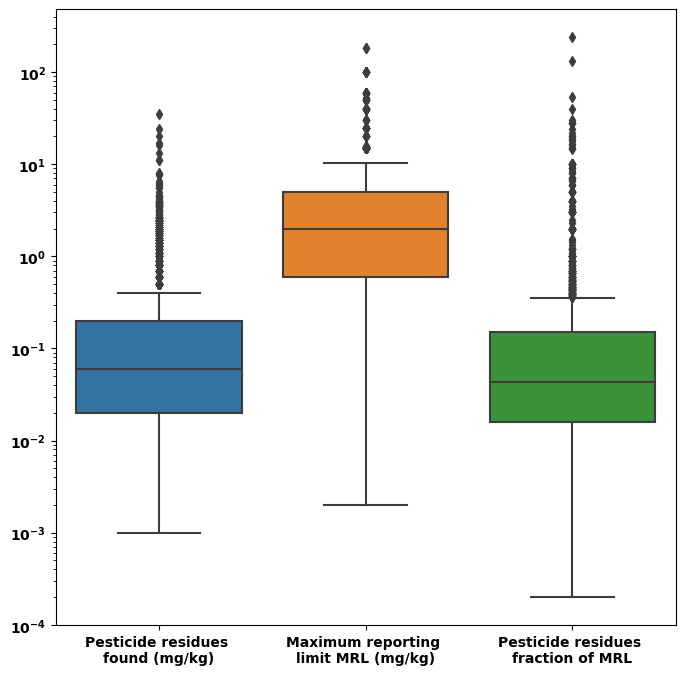

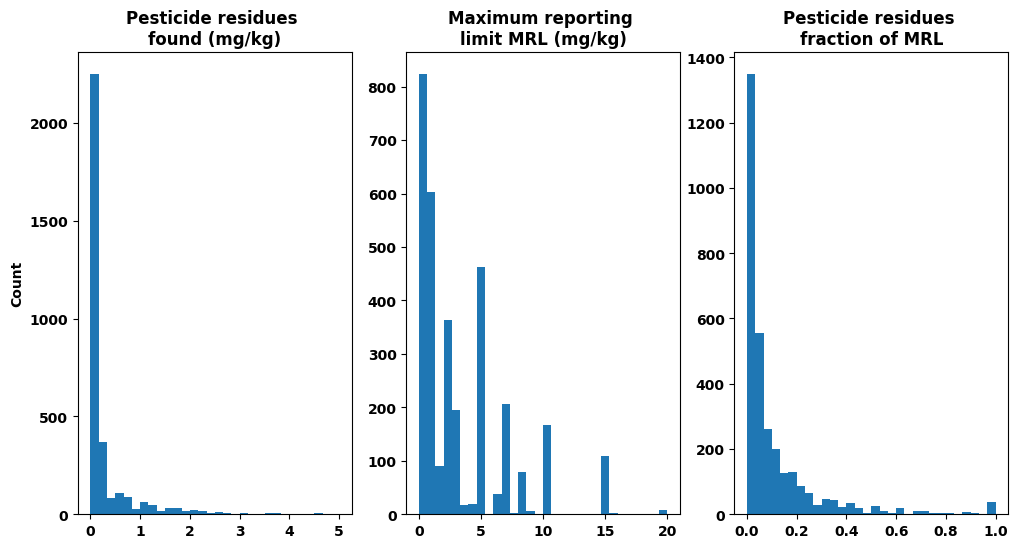

In [6]:
column_names_dict={'amount_detected':  'Pesticide residues \nfound (mg/kg)' ,
                    'mrl': 'Maximum reporting \nlimit MRL (mg/kg)', 
                    'amount_pc' : 'Pesticide residues \nfraction of MRL'}

def range_plots(df2: pd.DataFrame, 
                plot_type: str ='boxplot', column_to_plot: str = 'amount_detected',                
                cols_numeric: list=[], max_bin: list=[], bin_no: int = 30,
                column_names_dict: dict =column_names_dict ) -> plt.figure:
    """
    Produces plots to show ranges in data
    N.B. zeros are removed
    https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
    change for violinplot
    
    Args:
        df2 (pd.DataFrame): Pandas DataFrame. Pesticide data after grouping
        plot_type (str): string of type of plot to do 'boxplot' or 'hist'
        column_to_plot (str): which column to plot
        cols_numeric (list[str]): list of column strings to plot (no input finds numeric columns)
        max_bin (list[float]): list of floats (or ints) to gave max range for histogram (min = 0). 
        bin_no (int): number of bins
        column_names_dict (dict): dict of what to change column names to and from                        
        
    Raises:
        ValueError: ??

    Returns:
        pyplot figures object of a boxplot or histogram
    """
    
    # if no input of cols_numeric finds from dtype=int or float
    if not cols_numeric:
        cols_numeric = [column for column in df2 if df2[column].dtype=='float' or df2[column].dtype=='int' ]
    
    # get just the cols_numeric columns
    numeric_df = df2.loc[:,cols_numeric].copy()
    numeric_df = numeric_df.loc[ numeric_df[column_to_plot]!=0]
    
    # rename columns
    numeric_df = numeric_df.rename(columns = column_names_dict)

    # different plot types
    
    if plot_type=='boxplot':
    
        fig = plt.figure(figsize=(8,8))
        sns.boxplot( data = numeric_df )
        plt.yscale('log')
    
    elif plot_type=='hist':
        
        n_cols = 3
        n_rows = len(numeric_df.columns) // n_cols 

        fig, ax = plt.subplots(nrows= n_rows, ncols= n_cols, sharex= False,
                                    figsize= (12, 6))

        if not max_bin:
            max_bin = [5, 20, 1]
            
        for i,cols in enumerate(numeric_df):
            data_col = numeric_df[cols]
            counts, bins = np.histogram(data_col,
                    range = [0, max_bin[i]], bins= bin_no)
            ax[i].hist(bins[:-1], bins, weights=counts)
            
            # ax[i].set_yscale('log')
            ax[i].set_title(cols)
            if i==0:
                ax[i].set_ylabel('Count')
    
    return fig

range_plots(df2);
range_plots(df2,plot_type='hist');


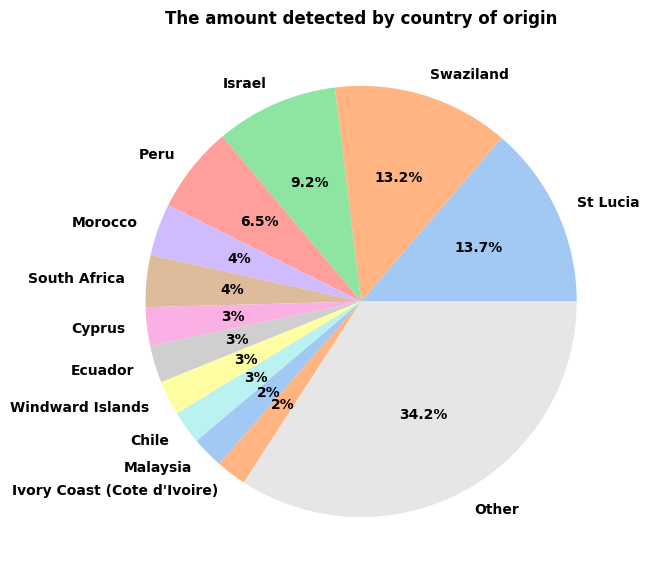

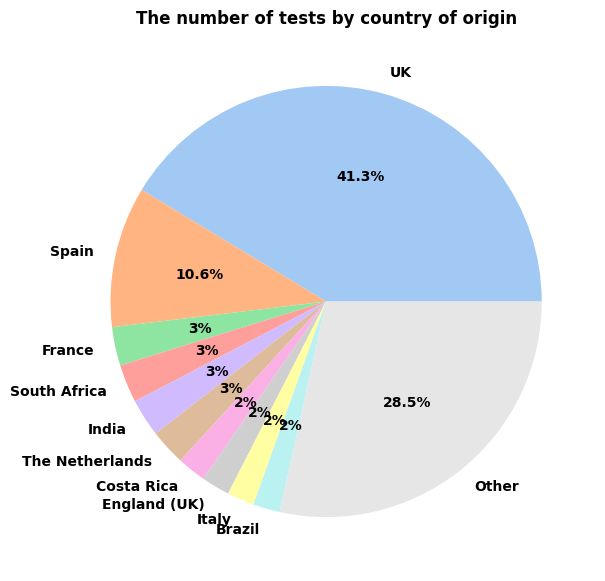

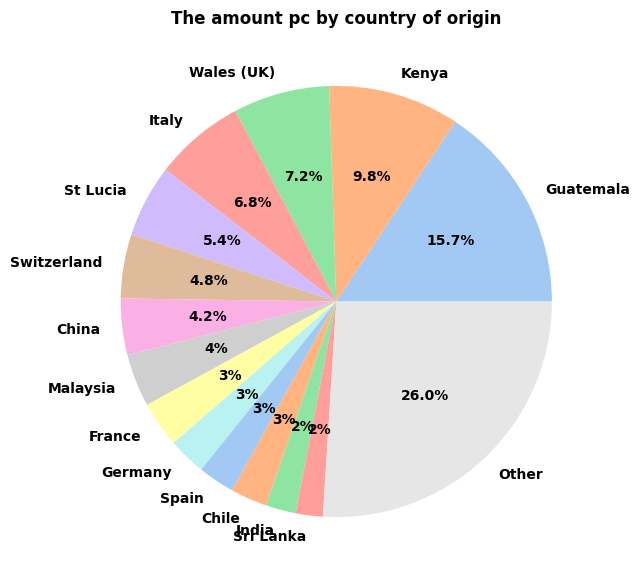

In [7]:
def pie_plot(df_grouped_temp: pd.DataFrame, 
             col_groupby : str = 'country_of_origin', col_plot: str ='number_of_tests',
             NUM_LABELS : int = 15, MIN_PCT : float = 2.) -> plt.figure:
    """
    Produces a pie plot from grouped data see groupby_id_country_chemical which does the grouping
    

    Args:
        df_grouped_temp (pd.DataFrame): Pandas DataFrame. Pesticide data after grouping
        col_groupby (str): which column has the names of the pie slices
        col_plot (str): which column has the data
        NUM_LABELS (int): max number of labels shown on the plot
        MIN_PCT (float): min % to display text has to be more than
        
    Raises:
        ValueError: ??

    Returns:
        pyplot figures object of a pie chart
    """
    
    maxed_out = False
    
    # what multiple of MIN_PCT have no decimal point
    go_to_1dp = 2.
    
    df_grouped_temp = df_grouped_temp[[col_groupby, col_plot]].copy()
    
    df_grouped_temp = df_grouped_temp.sort_values(col_plot, ascending=False)
    
    if len(df_grouped_temp) > NUM_LABELS:
        df_grouped_temp[col_plot] = 100*df_grouped_temp[col_plot]/sum(df_grouped_temp[col_plot])

        df_grouped_temp = df_grouped_temp.loc[df_grouped_temp[col_plot]>MIN_PCT]

        new_row = pd.Series({col_groupby: 'Other', 
                             col_plot: 100-sum( df_grouped_temp[col_plot] )})

        df_grouped_temp = pd.concat([df_grouped_temp, new_row.to_frame().T], ignore_index=True)
        
        maxed_out = True
     
    
    labels=df_grouped_temp[col_groupby].copy()
    colors = sns.color_palette('pastel')
    len_colors = len(colors)
    
    # create colors of length of labels
    for i in range(0, len(labels)//len_colors + 1):
        colors= colors + colors
    colors = colors[:len(labels)]
    
    # if there is an 'other' make the other this color
    if maxed_out:
        colors[-1]=(.9,.9,.9)
    
    
    fig=plt.figure(figsize=(7,7))
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        if pct> MIN_PCT * go_to_1dp:
            text_out = "{:.1f}%".format(pct)
        else:
            text_out = "{:.0f}%".format(pct)
        return text_out

    wedges, texts, autotexts =plt.pie(df_grouped_temp[col_plot],  
            colors = colors, labels=labels,
            autopct=lambda pct: func(pct, df_grouped_temp[col_plot]));
    
    col_plot = col_plot.replace('_',' ')
    col_groupby = col_groupby.replace('_',' ')
    plt.title(f'The {col_plot} by {col_groupby}')

    return fig

pie_plot(df2_grouped,col_groupby='country_of_origin' , col_plot='amount_detected');

pie_plot(df2_grouped,col_groupby='country_of_origin' , col_plot='number_of_tests');

pie_plot(df2_grouped,col_groupby='country_of_origin' , col_plot='amount_pc');


## Changes with time



C:\Users\44781\AppData\Local\Temp\ipykernel_17720\2100727419.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  xx2 = xx.groupby(['month','week'], as_index=False).sum()
C:\Users\44781\AppData\Local\Temp\ipykernel_17720\2100727419.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  xx3 = xx.groupby('month', as_index=False).sum()


,month,week,amount_pc
0,1,3.500000,2.086306
1,2,7.000000,7.833231
2,3,10.500000,2.774463
3,4,16.000000,19.927724
4,5,19.666667,10.779852
5,6,24.000000,23.025182
6,7,27.333333,24.129023
7,8,32.500000,31.458573
8,9,37.000000,31.762303
9,10,42.000000,23.999908


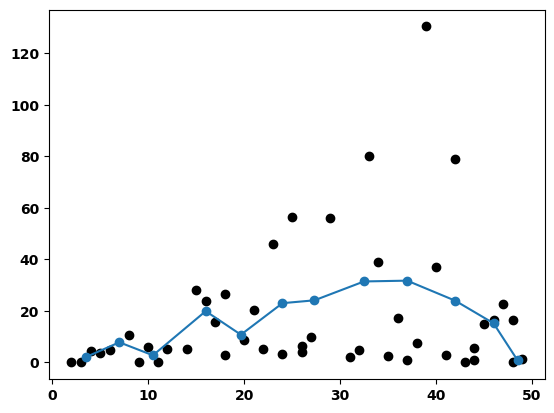

In [8]:
# Return a named tuple object with three components: year, week and weekday
# https://docs.python.org/3/library/datetime.html#datetime.date.isocalendar
def get_week(x):
    
    return x.isocalendar()[1]


xx=df2_grouped_sample.copy()
xx['week'] = df2_grouped_sample['date_of_sampling'].apply(get_week)
xx['month'] = pd.DatetimeIndex(xx['date_of_sampling']).month
xx2 = xx.groupby(['month','week'], as_index=False).sum()


plt.plot(xx2['week'], xx2['amount_pc'],'ok')

# xx2

xx3 = xx.groupby('month', as_index=False).sum()
# xx3['week'] = 
xx3 = xx2.loc[:,['month','week','amount_pc']].groupby('month', as_index=False).mean()
plt.plot(xx3['week'], xx3['amount_pc'],'-o')
xx3
# xx3


In [9]:
# xx2 = xx.groupby('month', as_index=False).mean()
# plt.plot(xx2['week'], xx2['amount_pc'],'-o')

# xx2

## Other Stuff

Didn't make the grade ideas

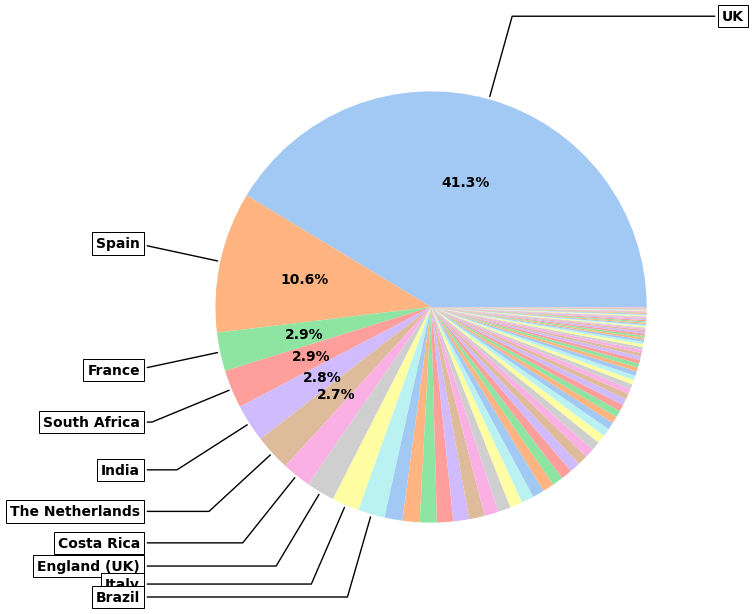

In [10]:

labels=df2_grouped['country_of_origin']
colors = sns.color_palette('pastel')[0:len(labels)]
fig=plt.figure(figsize=(7,7))
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    if pct>2.5:
        text_out = "{:.1f}%".format(pct)
    else:
        text_out=''
    return text_out

wedges, texts, autotexts =plt.pie(df2_grouped['number_of_tests'],  colors = colors,
    autopct=lambda pct: func(pct, df2_grouped['number_of_tests']));

# plt.legend(wedges[0:10], labels[0:10],
#           title="Ingredients",
#           loc="center left",
#           bbox_to_anchor=(1, 0, 0.5, 1))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    if i<10:
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        plt.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)

C:\Users\44781\AppData\Local\Temp\ipykernel_17720\11647735.py:33: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  labels[NUM_LABELS:]=''


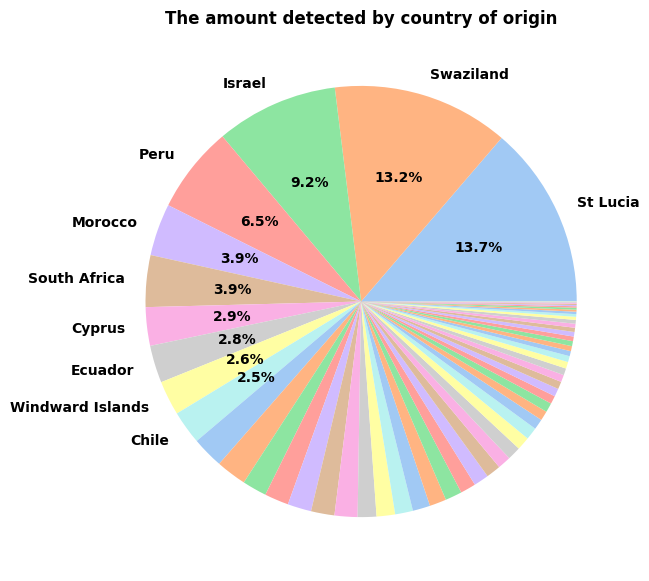

In [11]:
def pie_plot_old(df_grouped_temp: pd.DataFrame, 
             col_groupby : str = 'country_of_origin', col_plot : str ='number_of_tests',
             NUM_LABELS : int = 10, MIN_PCT : float = 2.5) -> plt.figure:
    """
    Produces a pie plot from grouped data see groupby_id_country_chemical which does the grouping
    
    Ideas: 
        - below a certain % values go to 'other'

    Args:
        df_grouped_temp (pd.DataFrame): Pandas DataFrame. Pesticide data after grouping
        col_groupby (str): which column has the names of the pie slices
        col_plot (str): which column has the data
        NUM_LABELS (int): max number of labels shown on the plot
        MIN_PCT (float): min % to display text has to be more than
        
    Raises:
        ValueError: ??

    Returns:
        pyplot figures object of a pie chart
    """
    
    df_grouped_temp = df_grouped_temp.copy()
    
    df_grouped_temp = df_grouped_temp.sort_values(col_plot, ascending=False)
    
    
    
    labels=df_grouped_temp[col_groupby].copy()

    if len(labels)>NUM_LABELS:
        labels[NUM_LABELS:]=''
        
    colors = sns.color_palette('pastel')[0:len(labels)]
    fig=plt.figure(figsize=(7,7))
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        if pct> MIN_PCT:
            text_out = "{:.1f}%".format(pct)
        else:
            text_out=''
        return text_out

    wedges, texts, autotexts =plt.pie(df_grouped_temp[col_plot],  
            colors = colors, labels=labels,
            autopct=lambda pct: func(pct, df_grouped_temp[col_plot]));
    
    col_plot = col_plot.replace('_',' ')
    col_groupby = col_groupby.replace('_',' ')
    plt.title(f'The {col_plot} by {col_groupby}')

    return fig

pie_plot_old(df2_grouped,col_groupby='country_of_origin' , col_plot='amount_detected');

